In [1]:
import torch, torch_geometric
from src import graphCA
from src.graphCNN import GraphCNN
import networkx as nx
from torch_geometric.nn import GCNConv

In [2]:
features=20
sequence=torch.rand(10,features)

# simple graph example

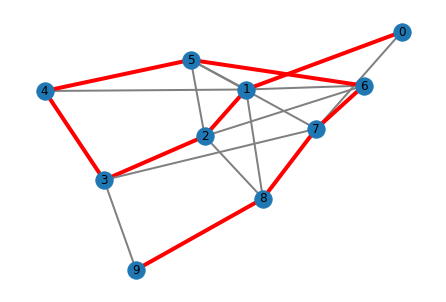

In [6]:
data=graphCA.sequence_to_random_graph(sequence,5)
g = torch_geometric.utils.to_networkx(data, to_undirected=True)
colors= ['red' if edge[0]==edge[1]-1 else 'grey' for edge in g.edges()]
width= [4 if edge[0]==edge[1]-1 else 2 for edge in g.edges()]
nx.draw(g,edge_color=colors, width=width, with_labels=True)

update_f=GraphCNN(features)

In [9]:
data['x']=update_f(data)

In [12]:
type(data)

torch_geometric.data.data.Data